# Display a Borehole from Striplog in PyVista  

Display all the intervals in a random way with the correct center and height

In [12]:
from striplog.striplog import Striplog
import pyvista as pv
import pandas as pd
import scipy

## Striplog Object

### Create a Striplog Object from png

In [13]:
from striplog import Legend, Lexicon, Interval, Component
legend = Legend.builtin('NSDOE')
lexicon = Lexicon.default()

In [14]:
imgfile = "M-MG-70_14.3_135.9.png"
strip = Striplog.from_img(imgfile, 14.3, 135.9, legend=legend)


/home/gfa/.local/share/virtualenvs/GSDMA2019-F9ES6BKJ/lib/python3.6/site-packages/striplog/striplog.py:868: UserWarning: from_img() is deprecated; please use from_image()
  warnings.warn(w)


### Add Multiple Intervals on the same plot

Creation of a list of intervals

In [15]:
list_of_intervals = []
for i in strip:
    list_of_intervals.append(i)

In [16]:
def add_interval_list(intervals,plotter,radius=.09):
    """
    add a list of intervals to a plotter 
    :param intervals: list of intervals to add to the plotter 
    :type intervals: list
    :param plotter: plotter pyvista 
    :type plotter: pyvista.plotting.plotting.Plotter
    :param radius: radius of the boreholes (if different radii, make distinct lists of intervals)
    :type radius: float
    """    
    cylinders = []
    i = 0
    for interval in intervals:
        
        i = intervals.index(interval)
        
        center = (interval.base.middle - interval.top.middle)/2
        height = interval.base.middle - interval.top.middle
        
        cylinders.append( 
                    pv.Cylinder(
                                    center = center,
                                    height = height,
                                    direction = (0.0, 0.0, 1.0),
                                    radius = radius, 
                                    
                                  )
                        
                            )
    
        plotter.add_mesh(cylinders[i], color="tan", show_edges=False)
    print(2)
    print(type(plotter))
    print(type(radius))
    plotter.show(auto_close=False, use_panel=True)

Creation of the plotter

In [17]:
plotter = pv.Plotter(shape=(1,1))

Use the function and display on the plotter

2
<class 'pyvista.plotting.plotting.Plotter'>
<class 'float'>


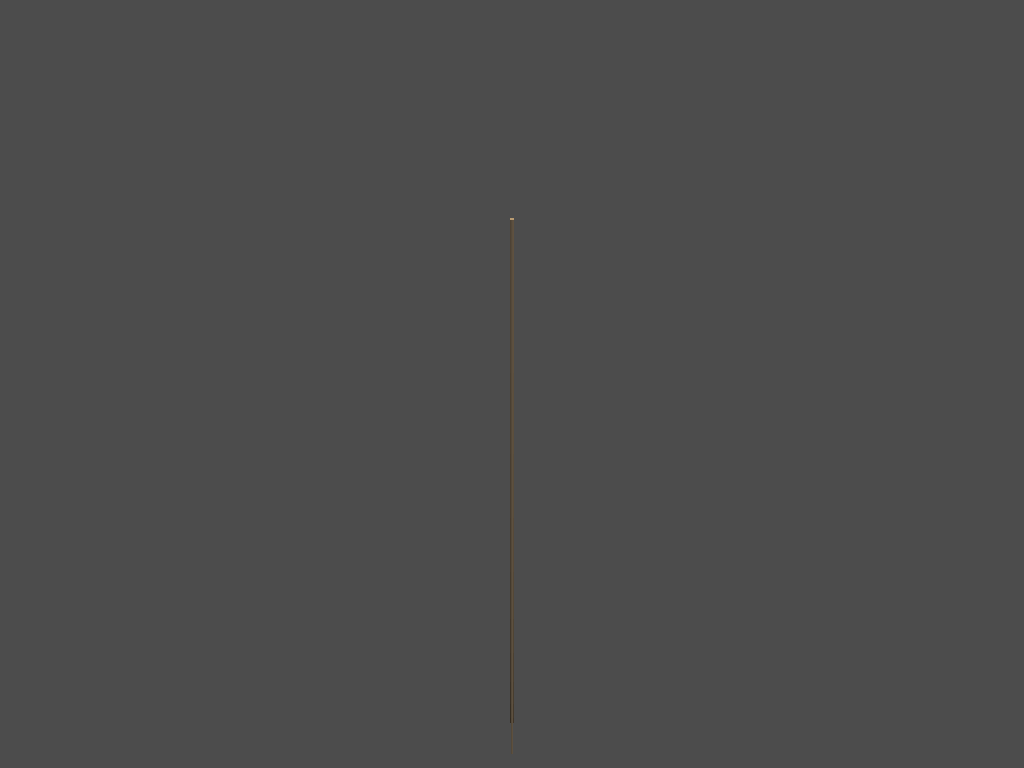

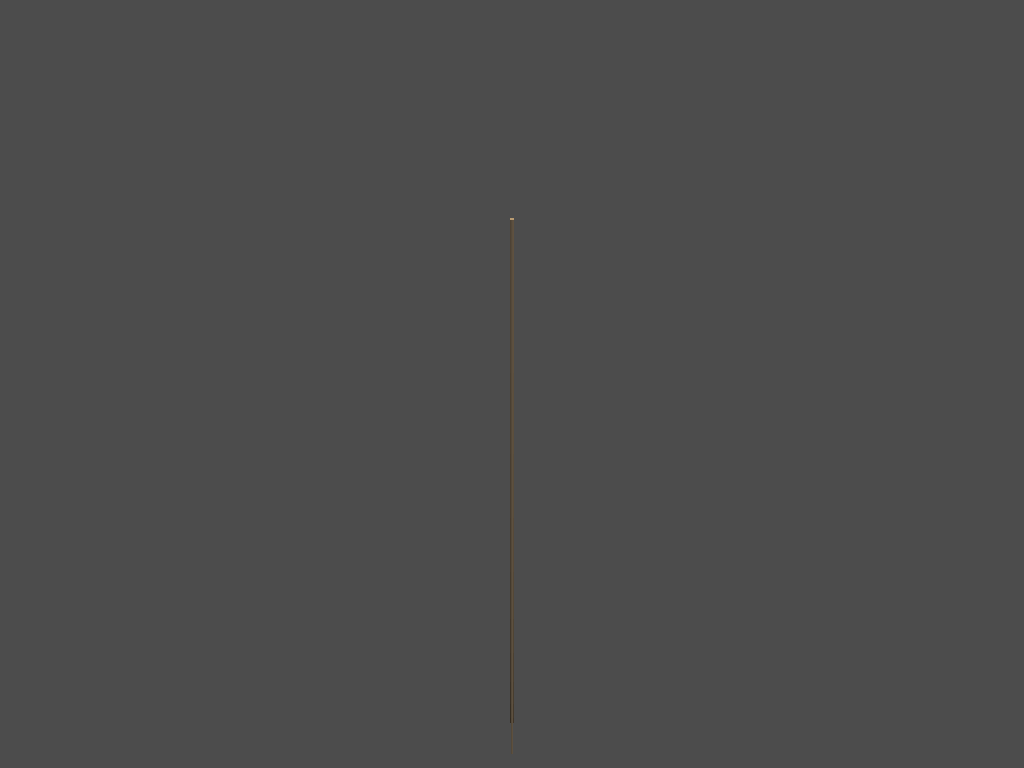

In [18]:
add_interval_list(list_of_intervals, plotter)
plotter.show(auto_close=False, use_panel=True)